# Test for Iris Dataset

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 24 20:53:46 2019
Author: Mert Dogan
Explanation: This code classify flower pictures given as iris.csv according to using kNN classifier implementation.
"""

'\nCreated on Sun Feb 24 20:53:46 2019\nAuthor: Mert Dogan\nExplanation: This code classify flower pictures given as iris.csv according to using kNN classifier implementation.\n'

In [2]:
#import necessary libraries

import pandas as pd  #For using data frame
import numpy as np   #For using fast and efficiency matrix operations
import matplotlib.pyplot as plt #For plot our data
plt.style.use('ggplot') #Use matplotlib like ggplot style
import operator #For using sort operations
from matplotlib.colors import ListedColormap

In [3]:
def load_data(file_name, i, j):
    """
    This function gets a csv file from an input, load and split it to training and test np arrays.
    Function parameters: file_name as csv file, i and j as choosen features
    """
    #read the csv file with using pandas dataframe
    data = pd.read_csv(file_name, sep=',', header=None, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Label'])
    
    #extract features and their labels
    features = data.iloc[ : ,[i,j,4]]
    
    #split training sets (30,30,30)
    training1 = features.iloc[:30, :]
    training2 = features.iloc[50:80, :]
    training3 = features.iloc[100:130, :]

    
    #append the seperate training sets and convert data frame to np array
    training = training1.append(training2).append(training3).values

    
    # For create testing and its labels
    # and split training sets (20,20,20)
    test1 = features.iloc[30:50,:]
    test2 = features.iloc[80:100,:]
    test3 = features.iloc[130:150,:]
    
    #append the seperate test sets and convert data frame to np array
    test = test1.append(test2).append(test3).values
    
    data_df = data.iloc[ : , [i,j,4]] #the whole data set as pandas data frame
    
    
    return training, test, data_df


In [4]:
def convert_label(data):
    """
    This function convert the data sets' labels as digits (1,2,3).
    Function parameters: 
    """
    for i in range(len(data)):
        if data[i][2] == 'Iris-setosa':
            data[i][2] = 1
        elif data[i][2] == 'Iris-versicolor':
            data[i][2] = 2
        elif data[i][2] == 'Iris-virginica':
            data[i][2] = 3
    return data

In [5]:
def euclideanDistance(instance1, instance2):
    """
    This function calculates euclidean distance (L2) between two instance data points.
    Function parameters = instance1 and instance2 as data points (Sepal Length, Petal Length..etc).
    The function returns calculated euclidean distance by taking square root.
    """

    dist = np.linalg.norm(instance1 - instance2)
    return dist

    #Implementation of euclidean distance that not using with np.linalg.norm()
    """
    distance = 0.0
    for i in range(length):
        distance += np.square(instance1[i] - instance2[i]) #Calculating distance
    return np.sqrt(distance) #Return square root of calculating result.
    """

In [6]:
def manhattan_dist(instance1, instance2):
    """
    This function calculates manhattan distance (L1) distance between two instance data points.
    Function parameters = instance1 and instance2 as data points (Sepal Length, Petal Length..etc).
    The function returns calculated manhattan distance.
    """
    return sum(abs(instance1 - instance2))

In [7]:
def cos_sim(instance1, instance2):
    """
    This function calculates cosine distance (similarity) between two instance data points.
    Frist take dot product between two instance and divide by their multiply of their norms.
    Function parameters = instance1 and instance2 as data points (Sepal Length, Petal Length..etc).
    The function returns calculated cosine distance.
    """
    
    dot_product = np.dot(instance1, instance2) #dot product
    norm_instance1 = np.linalg.norm(instance1) #norm calculations
    norm_instance2 = np.linalg.norm(instance2)
    return dot_product / (norm_instance1 * norm_instance2) #dot products divided by norms

In [8]:
def knn(training, test, k, method):
    """
    This function find the k nearest neighbour by using a training set and test data set.
    Function parameters = training as learning set, test as testing the tarining set, k as how many neighboor,
    and method as the distance methods.
    The function returns neighbours that sorted as k th neighboor
    """
    distances = [] #distances list
    neighbors = [] #neigbors list
    length = len(test) #length of test set
    
    
    if method == 'euclidean': #Euclidean distance (L2)
        
        for x in range(len(training)):
            dist = euclideanDistance(test[0:2],training[x][0:2]) #Calculate distances
            distances.append((training[x], dist)) #append the distances to the distances list

        distances.sort(key=operator.itemgetter(1)) #sort the distances as ascending order
        
        for x in range(k):
            neighbors.append(distances[x][0]) #find the k th neighbours
        return neighbors
    
    elif method == 'cosine': #Cosine similarity
        
        for x in range(len(training)):
            dist = cos_sim(test[0:2],training[x][0:2]) #Calculate distances
            distances.append((training[x], dist)) #append the distances to the distances list

        distances.sort(key=operator.itemgetter(1), reverse=True) #sort the distances
        
        for x in range(k):
            neighbors.append(distances[x][0]) #find the k th neighbours
        return neighbors
    
    elif method == 'manhattan': #Manhattan distance (L1) 
        
        for x in range(len(training)):
            dist = manhattan_dist(test[0:2],training[x][0:2]) #Calculate distances
            distances.append((training[x], dist)) #append the distances to the distances list

        distances.sort(key=operator.itemgetter(1)) #sort the distances as ascending order
        
        for x in range(k):
            neighbors.append(distances[x][0]) #find the k th neighbours
        return neighbors

In [9]:
def predict_response(neighbours):
    """
    This function devises a predicted response based on their neighbours as a vote for their class attribute
    and take the majority vote as the prediction. In the end the function sorts votes and returns the prediction.
    Function parameters: the data point's neighbours.
    """
    vote = {} #create a dictionary to store the response votes.
    
    for x in range(len(neighbours)): #iterate through neighbours
        response = neighbours[x][-1] #take the label
        if response in vote:
            vote[response] += 1 #if label in vote increase 1
        else:
            vote[response] = 1 #if label is not in vote, add into the vote dictionary
    sortedVote = sorted(vote.items(), key=operator.itemgetter(1), reverse = True) #sort the votes
    return sortedVote[0][0] #returns the closest neighbour's label

In [10]:
def get_accuracy(test, prediction):
    """
    This function compares the test set and the predictions and count the correctness.
    In the end function print the error count and returns accuracy rate.
    Function parameters: the data point's neighbours.
    """
    correct = 0
    for x in range(len(test)):
        if test[x][-1] == prediction[x]:
            correct += 1
    count = len(test) - correct
    print('\nError Count:', count, '/', len(test))
    return (correct / float(len(test))) * 100

In [11]:
def plot_data(x, y,title):
    """
    This function plot a scatter plot with using the numpy arrays.
    Function parameters: x as test or training set, y as label or predictions.
    """
    plt.figure(figsize=(10,10))
    # For Setosa
    plt.scatter(x[:,:2][y==1,0],x[:,:2][y==1,1],c="b")
    # For Versicolor 
    plt.scatter(x[:,:2][y==2,0],x[:,:2][y==2,1],c='r')
    # For Virginica 
    plt.scatter(x[:,:2][y==3,0],x[:,:2][y==3,1],c="g")

    plt.legend(['setosa', 'versicolor', 'virginica'])
    plt.xlabel('Sepal Length(cm)')
    plt.ylabel('Petal Length(cm)')
    plt.title(title);

In [12]:
def main():
    """
    This function covers all methods and performs knn implementation and plot the data.

    """
    #initializing
    predictions = []
    
    
    text = "Please enter two feature what would you want: \n0: SepalLength,\n1: SepalWidth,\n2: PetalLength,\n3: PetalWidth "
    select1, select2 = [int(x) for x in input(text+'\n'+'Please leave a space between the digits \n').split()]
    training,test, data = load_data('iris_data.csv', select1, select2)
    print ('Train set: ' + repr(len(training)))
    print ('Test set: ' + repr(len(test)))
    method = input('Which distance method would you like to use? (euclidean, manhattan, cosine)\n')
    print("The chosen distance method is:",method +"\n")
    k = int(input('Please enter the neighbour number (k) \n'))
    
    data = data.values # convert data frame to numpy array
    data = convert_label(data)
    label = data[:,2]
    title = "Original data"
    plot_data(data, label, title)
    
    #applying knn
    for i in range(len(test)):
        neighbors = knn(training, test[i], k, method) #call knn function
        result = predict_response(neighbors)
        predictions.append(result)
        print('--> Predicted= ' + result + ', Real= ' + test[i][-1])
    accuracy = get_accuracy(test, predictions) #getting accuracy
    print('Accuracy: ' + "%.2f" % float(repr(accuracy)) + '%')
    
    
    #convert labels
    for i in range(len(predictions)):
        if predictions[i] == 'Iris-setosa':
            predictions[i] = 1
        elif predictions[i] == 'Iris-versicolor':
            predictions[i] = 2
        elif predictions[i] == 'Iris-virginica':
            predictions[i] = 3
    
    predictions = np.asarray(predictions, dtype=np.int64) #convert the list to numpy array
    #plot the knn predictions
    title = "The nearest "+str(k) + " neighbors were used in kNN"
    plot_data(test, predictions,title)

In [13]:
training,test, data = load_data('iris_data.csv',0,3) # 0 and 3 features
data #Represent the data as pandast dataframe


,SepalLength,PetalWidth,Label
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa
5,5.4,0.4,Iris-setosa
6,4.6,0.3,Iris-setosa
7,5.0,0.2,Iris-setosa
8,4.4,0.2,Iris-setosa
9,4.9,0.1,Iris-setosa


Please enter two feature what would you want: 
0: SepalLength,
1: SepalWidth,
2: PetalLength,
3: PetalWidth 
Please leave a space between the digits 
0 3
Train set: 90
Test set: 60
Which distance method would you like to use? (euclidean, manhattan, cosine)
euclidean
The chosen distance method is: euclidean

Please enter the neighbour number (k) 
3
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Predicted= Iris-setosa, Real= Iris-setosa
--> Pr

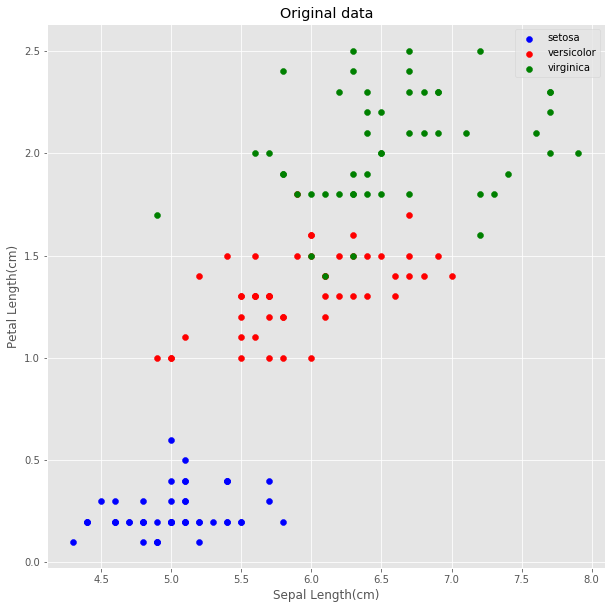

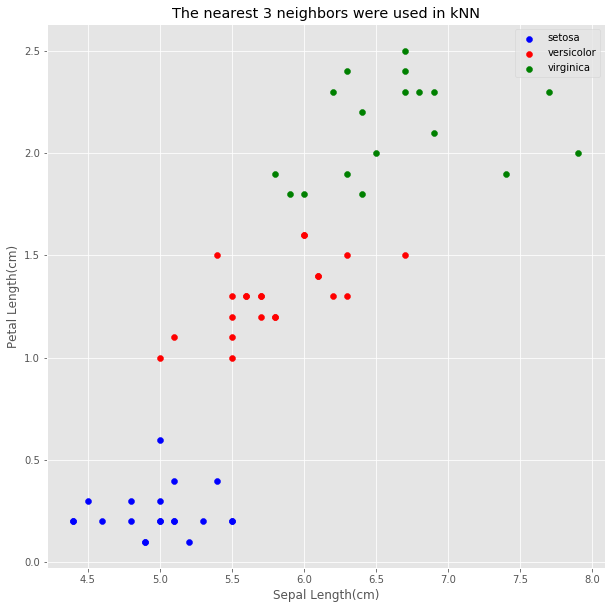

In [14]:
main()